# ChromaのPythonライブラリをインストール

In [7]:
!pip install chromadb
!pip install open-clip-torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 864.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

# ライブラリとデータをロード

In [25]:
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
from matplotlib import pyplot as plt
import cv2

# Chromaの使い方

## Step 1: ChromaのデータをDiskにセーブ

In [48]:
# testのフォルダーが作られ、chroma.sqlite3が作成される
chroma_client = chromadb.PersistentClient(path="test") #　Pathはセーブしたいロケーション　（今回はGoogle Colabなので名前だけ）

## Step 2: Multi-modal EmbeddingとData Loadersをインスタンス化

Image & Text-ModelsのEmbeddingはClipのみサポート
https://www.sbert.net/docs/sentence_transformer/pretrained_models.html#image-text-models

In [49]:
multi_modal_embed = OpenCLIPEmbeddingFunction()  # Clipをインストールしないとエラーが出る

In [50]:
data_loader = ImageLoader()  # ImageLoaderはChromaの中にURLを保存する （イメージではない）

## Step 3: Vector　Databaseを作成

create_collection: Collectionを作成  
get_collection: 作成済みのcollectionに接続  
get_or_create_collection: Collectionがある場合は取得、ない場合は新規作成  

*Chromaはget_or_create_collectionを使う事を推奨している

In [52]:
multimodal_db = chroma_client.get_or_create_collection(
    name="test",
    embedding_function=multi_modal_embed,
    data_loader=data_loader)

## Step 4-1: データをCollectionに加える

In [53]:
multimodal_db.add(
    ids=[
        'E23',
        'E25',
        'E33',
    ],
    uris=[
        'E23-2.jpg',
        'E25-2.jpg',
        'E33-2.jpg',
    ],
)

In [54]:
multimodal_db.peek() #peekは追加されたデータを見れる

{'ids': ['E23', 'E25', 'E33'],
 'embeddings': array([[-0.02114543,  0.06216114, -0.00340323, ..., -0.0405184 ,
         -0.00851482,  0.02575648],
        [-0.04898299,  0.05020182, -0.07143153, ..., -0.04625597,
          0.01150953,  0.01912946],
        [-0.03301078,  0.01421306, -0.06765204, ..., -0.08879309,
          0.00024403,  0.04914411]]),
 'documents': [None, None, None],
 'uris': None,
 'included': ['metadatas', 'documents', 'embeddings'],
 'data': None,
 'metadatas': [{}, {}, {}]}

MetaDatasetsにデータを追加したい

## Step 4-2: Collectionのデータをアップデートする

update：idsを使いアップデートする、idsがない場合は無視をしてログに保存される

upsert：upsertはidsがない場合はエラーで帰ってくる

*updateを推奨

In [73]:
multimodal_db.update(
    ids=[
        'E23',
        'E25',
        'E33',
        'AAAAA',  # 存在しないID
    ],
    metadatas=[
        {"item_id":'E23', 'img_category':'food', 'item_name':'Braised Fried Tofu with Greens'},
        {"item_id":'E25', 'img_category':'food', 'item_name':'Sauteed Assorted Vegetables'},
        {"item_id":'E33', 'img_category':'food', 'item_name':'Kung Pao Tofu'},
        {"item_id":'AAAAA'} # 存在しないID用の存在しないメタデータ
    ]
)  #idsを忘れないように

In [71]:
multimodal_db.peek()

{'ids': ['E23', 'E25', 'E33'],
 'embeddings': array([[-0.02114543,  0.06216114, -0.00340323, ..., -0.0405184 ,
         -0.00851482,  0.02575648],
        [-0.04898299,  0.05020182, -0.07143153, ..., -0.04625597,
          0.01150953,  0.01912946],
        [-0.03301078,  0.01421306, -0.06765204, ..., -0.08879309,
          0.00024403,  0.04914411]]),
 'documents': [None, None, None],
 'uris': None,
 'included': ['metadatas', 'documents', 'embeddings'],
 'data': None,
 'metadatas': [{'item_name': 'Braised Fried Tofu with Greens',
   'img_category': 'food',
   'item_id': 'E23'},
  {'item_id': 'E25',
   'item_name': 'Sauteed Assorted Vegetables',
   'img_category': 'food'},
  {'item_id': 'E33', 'img_category': 'food', 'item_name': 'Kung Pao Tofu'}]}

MetaDatasetsにデータを追加された

## Step 5-1: TextでQueryを書く

In [57]:
results_text = multimodal_db.query(
    query_texts = ["carrot"],
    n_results=1,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
    where={'img_category':'food'}
)
results_text

{'ids': [['E23']],
 'embeddings': None,
 'documents': [[None]],
 'uris': [['E23-2.jpg']],
 'included': ['documents', 'distances', 'metadatas', 'data', 'uris'],
 'data': [[array([[[137, 158, 189],
           [137, 158, 189],
           [146, 167, 198],
           ...,
           [157, 170, 189],
           [156, 169, 188],
           [153, 166, 185]],
   
          [[137, 158, 189],
           [136, 157, 188],
           [136, 157, 188],
           ...,
           [157, 170, 189],
           [156, 169, 188],
           [155, 168, 187]],
   
          [[134, 155, 186],
           [130, 151, 182],
           [128, 149, 180],
           ...,
           [158, 170, 192],
           [158, 170, 192],
           [157, 169, 191]],
   
          ...,
   
          [[140,  89,  85],
           [142,  91,  87],
           [145,  95,  86],
           ...,
           [154, 188, 236],
           [155, 189, 237],
           [156, 190, 238]],
   
          [[142,  89,  85],
           [144,  91,  87],
 

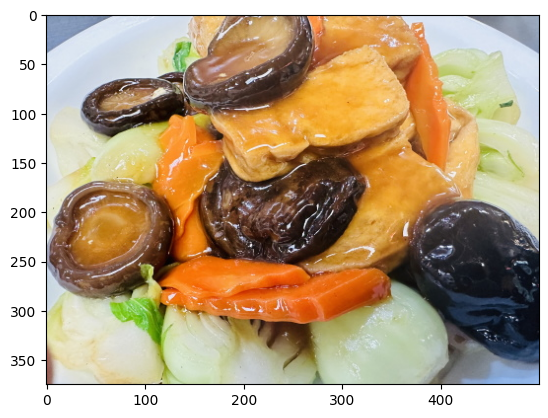

In [58]:
plt.imshow(results_text['data'][0][0])

## Step 5-2: Image（RGB）でQueryを書く

array([[[137, 158, 189],
        [137, 158, 189],
        [146, 167, 198],
        ...,
        [157, 170, 189],
        [156, 169, 188],
        [153, 166, 185]],

       [[137, 158, 189],
        [136, 157, 188],
        [136, 157, 188],
        ...,
        [157, 170, 189],
        [156, 169, 188],
        [155, 168, 187]],

       [[134, 155, 186],
        [130, 151, 182],
        [128, 149, 180],
        ...,
        [158, 170, 192],
        [158, 170, 192],
        [157, 169, 191]],

       ...,

       [[140,  89,  85],
        [142,  91,  87],
        [145,  95,  86],
        ...,
        [154, 188, 236],
        [155, 189, 237],
        [156, 190, 238]],

       [[142,  89,  85],
        [144,  91,  87],
        [145,  95,  86],
        ...,
        [156, 190, 236],
        [156, 190, 236],
        [156, 190, 236]],

       [[140,  87,  83],
        [142,  89,  85],
        [144,  94,  85],
        ...,
        [157, 189, 236],
        [158, 190, 237],
        [158, 190, 237]]], dtype=uint8)
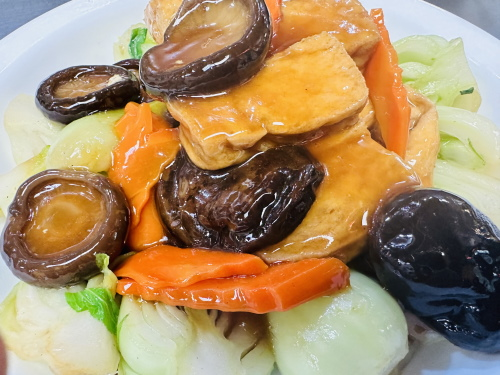

In [59]:
image = cv2.imread('E23-2.jpg')[...,::-1] # データベースはRGBの値で計算している
image

In [60]:
results_image = multimodal_db.query(
    query_images = image,
    n_results=1,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
    where={'img_category':'food'}
)
results_image

{'ids': [['E23']],
 'embeddings': None,
 'documents': [[None]],
 'uris': [['E23-2.jpg']],
 'included': ['documents', 'distances', 'metadatas', 'data', 'uris'],
 'data': [[array([[[137, 158, 189],
           [137, 158, 189],
           [146, 167, 198],
           ...,
           [157, 170, 189],
           [156, 169, 188],
           [153, 166, 185]],
   
          [[137, 158, 189],
           [136, 157, 188],
           [136, 157, 188],
           ...,
           [157, 170, 189],
           [156, 169, 188],
           [155, 168, 187]],
   
          [[134, 155, 186],
           [130, 151, 182],
           [128, 149, 180],
           ...,
           [158, 170, 192],
           [158, 170, 192],
           [157, 169, 191]],
   
          ...,
   
          [[140,  89,  85],
           [142,  91,  87],
           [145,  95,  86],
           ...,
           [154, 188, 236],
           [155, 189, 237],
           [156, 190, 238]],
   
          [[142,  89,  85],
           [144,  91,  87],
 

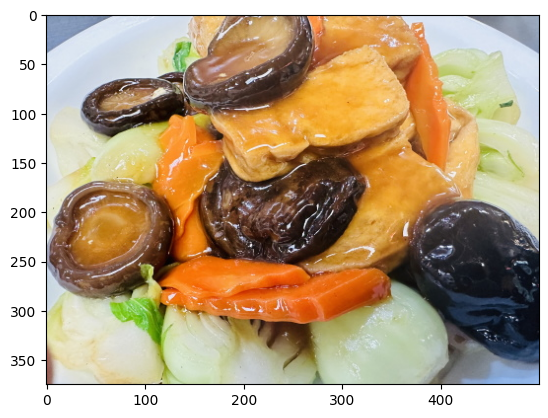

In [61]:
plt.imshow(results_image['data'][0][0])